<a href="https://colab.research.google.com/github/wogweno/MCS-7103/blob/main/retail_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="libraries"></a>
# 1.1 Importing Libraries & Utilities

In [61]:
!pip install missingno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import plotly.express as px
!pip install shap
import shap

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from hyperopt import hp, tpe, fmin, Trials
import numpy as np

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


<a name="dataset_loading"></a>

## 1.1.2 Dataset Loading

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/wogweno/MCS-7103/main/Retail%20Banking/data/processed/extract_data.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CLIENT_ID                    4708 non-null   object 
 1   NAME                         4708 non-null   object 
 2   SEX                          4708 non-null   object 
 3   EMAIL                        4708 non-null   object 
 4   AGE                          4708 non-null   int64  
 5   TYPE                         4708 non-null   object 
 6   STATE_NAME                   4708 non-null   object 
 7   REGION                       4708 non-null   object 
 8   DIVISION                     4708 non-null   object 
 9   CARD_TYPE                    4708 non-null   object 
 10  ACTIVE_YEARS                 4708 non-null   int64  
 11  ACTIVE_MONTHS                4708 non-null   int64  
 12  LOAN_AMOUNT                  4708 non-null   int64  
 13  LOAN_DURATION     

,CLIENT_ID,NAME,SEX,EMAIL,AGE,TYPE,STATE_NAME,REGION,DIVISION,CARD_TYPE,...,TOTAL_BALANCE,AVG_ANNUAL_INCOME,AVG_MONTHLY_INCOME,CLIENT_CATERGORY,TOTAL_PAYMENTS,HOUSEHOLD_PAYMENT,INSURANCE_PAYMENT,LEASING_PAYMENT,LOAN_PAYMENT,OTHER_PAYMENTS
0,C00000001,Emma Avaya Smith,Female,emma.smith@gmail.com,29,Owner,New Mexico,West,Mountain,No Card,...,1332479,333119.75,24226.89,High Income,2452.0,2452,0,0.0,0.0,0
1,C00000002,Noah Everest Thompson,Male,noah.thompson@gmail.com,54,Owner,New York,Northeast,Middle Atlantic,No Card,...,6083644,1013940.67,76045.55,High Networth,10638.7,7266,0,0.0,3372.7,0
2,C00000003,Olivia Brooklynne Johnson,Female,olivia.johnson@outlook.com,59,User,New York,Northeast,Middle Atlantic,No Card,...,6083644,1013940.67,76045.55,High Networth,10638.7,7266,0,0.0,3372.7,0
3,C00000004,Liam Irvin White,Male,liam.white@gmail.com,43,Owner,Indiana,Northeast,East North Central,No Card,...,1002172,501086.00,37117.48,High Networth,5001.0,1135,3539,0.0,0.0,327
4,C00000005,Sophia Danae Williams,Female,sophia.williams@gmail.com,39,User,Indiana,Northeast,East North Central,No Card,...,1002172,501086.00,37117.48,High Networth,5001.0,1135,3539,0.0,0.0,327


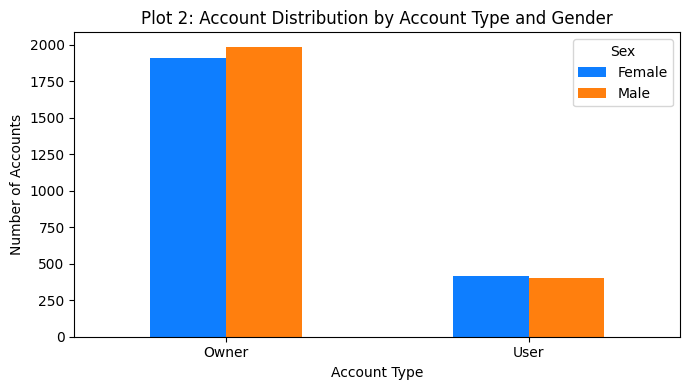

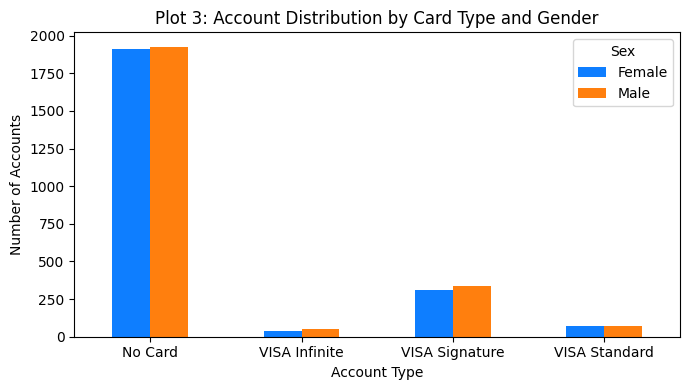

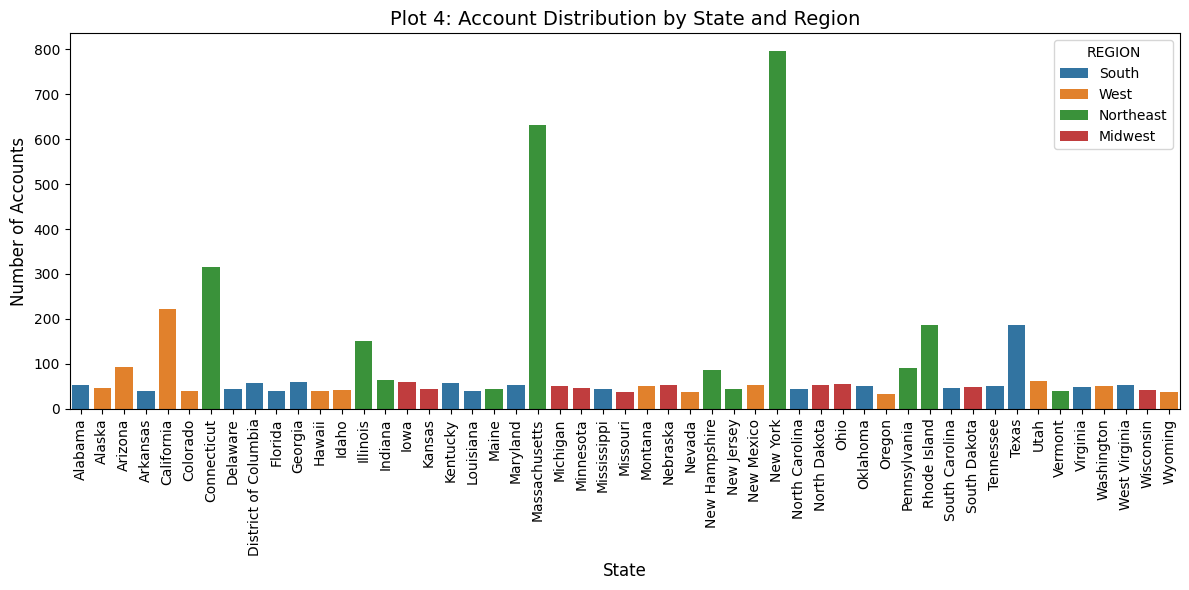

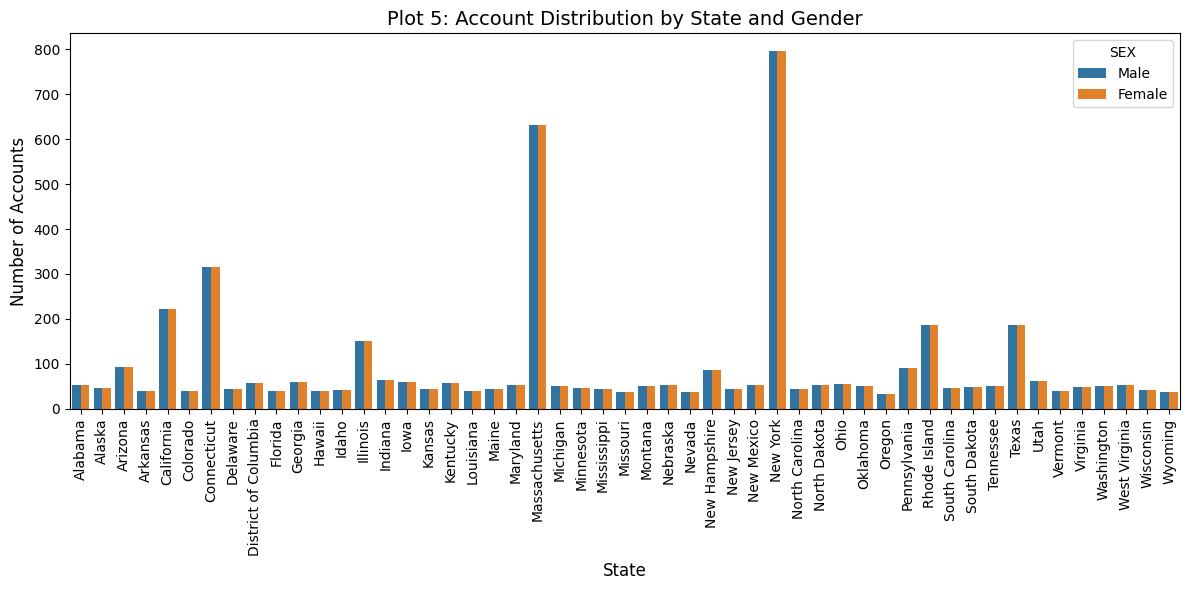

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Function to generate bar plots
def plot_bar(data, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    merged_data = pd.merge(data, df[['STATE_NAME', 'SEX']], on='STATE_NAME', how='left')
    sns.barplot(data=merged_data, x=x, y=y, hue=hue, errorbar=None) # Use merged_data
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot 1: Pie Chart - Account distribution based on Gender
fig = px.pie(df, names='SEX', title='Plot 1: Account distribution based on Gender', hole=0.44)
fig.update_layout(width=400, height=400)
fig.show()

# Plot 2: Grouped Bar Chart - Account Distribution by Type and Sex
account_type_sex_counts = df.groupby(['TYPE', 'SEX']).size().unstack(fill_value=0)
account_type_sex_counts.plot(kind='bar', figsize=(7, 4), color=['#0e7eff', '#ff7f0e'])
plt.title('Plot 2: Account Distribution by Account Type and Gender')
plt.xlabel('Account Type')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# Plot 3: Account Distribution by Card Type and Gender
account_type_sex_counts = df.groupby(['CARD_TYPE', 'SEX']).size().unstack(fill_value=0)
account_type_sex_counts.plot(kind='bar', figsize=(7, 4), color=['#0e7eff', '#ff7f0e'])
plt.title('Plot 3: Account Distribution by Card Type and Gender')
plt.xlabel('Account Type')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

# Create account_distribution DataFrame before using it
account_distribution = df.groupby(['STATE_NAME', 'REGION'])['CLIENT_ID'].count().reset_index()
# Assuming 'CLIENT_ID' represents an account, count them for each state and region
account_distribution.rename(columns={'CLIENT_ID': 'Account_Count'}, inplace=True)

# Plot 4: Account Distribution by State and Region
plot_bar(account_distribution, 'STATE_NAME', 'Account_Count', 'REGION', 'Plot 4: Account Distribution by State and Region', 'State', 'Number of Accounts')

# Plot 5: Account Distribution by State and Gender
plot_bar(account_distribution, 'STATE_NAME', 'Account_Count', 'SEX', 'Plot 5: Account Distribution by State and Gender', 'State', 'Number of Accounts')

# Plot 6: Distribution of accounts across Regions
fig = px.pie(df, names='REGION', title='Plot 6: Distribution of accounts across Regions', hole=0.33)
fig.update_layout(width=400, height=400)
fig.show()

# Plot 7: Pie Chart of Client Category Distribution
fig = px.pie(df, names='CLIENT_CATERGORY', title='Plot 7: Pie Chart of Client Category Distribution', hole=0.33)
fig.update_layout(width=500, height=500)
fig.show()


Explaination

# Feature Analysis


In [64]:
# Selecting and describing relevant columns for initial exploration
columns_of_interest = ['ACTIVE_YEARS', 'LOAN_AMOUNT', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS']
df_selected_col = df[columns_of_interest]

# Descriptive statistics for these columns to understand their distribution
summary_stats = df_selected_col.describe()
summary_stats

,ACTIVE_YEARS,LOAN_AMOUNT,CRMEVENT_COUNT,TRANS_COUNT,TOTAL_BALANCE,TOTAL_PAYMENTS
count,4708.000000,4708.000000,4708.000000,4708.000000,4.708000e+03,4708.000000
mean,3.764868,26665.223449,3.668224,242.809473,2.634718e+06,5412.219074
std,1.524442,75108.081741,1.937946,127.252558,2.580159e+06,3941.240113
min,1.000000,0.000000,0.000000,29.000000,6.684000e+03,0.000000
25%,3.000000,0.000000,2.000000,141.000000,9.683352e+05,2474.000000
50%,3.000000,0.000000,4.000000,216.000000,1.878907e+06,4211.000000
75%,5.000000,0.000000,5.000000,336.000000,3.382496e+06,7518.000000
max,6.000000,590820.000000,13.000000,675.000000,3.039596e+07,22704.300000


In [65]:

#['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT','TOTAL_BALANCE', 'TOTAL_PAYMENTS']
# 1 true
# 0 False


# Define thresholds for identifying potential churn
churn_criteria = {
    'ACTIVE_YEARS': 2,          # Low active years
    'CRMEVENT_COUNT': 2,        # Low transaction count
    'TRANS_COUNT': 141,         # Low transaction count
    'TOTAL_BALANCE': 968335,    # Low balance threshold
    'TOTAL_PAYMENTS': 2474      # Low payments threshold
}

# Create Churn column based on meeting at least two of the criteria above
df['churn'] = (
    ((df['ACTIVE_YEARS'] <= churn_criteria['ACTIVE_YEARS']).astype(int) +
     (df['CRMEVENT_COUNT'] <= churn_criteria['CRMEVENT_COUNT']).astype(int) +
     (df['TRANS_COUNT'] <= churn_criteria['TRANS_COUNT']).astype(int) +
     (df['TOTAL_BALANCE'] <= churn_criteria['TOTAL_BALANCE']).astype(int) +
     (df['TOTAL_PAYMENTS'] <= churn_criteria['TOTAL_PAYMENTS']).astype(int)) >= 2
).astype(int)

churn_distribution = (df['churn'] == 1).sum()
print(churn_distribution)

1610


## Visualize distributions and Correlation Part 3

<Figure size 800x600 with 0 Axes>

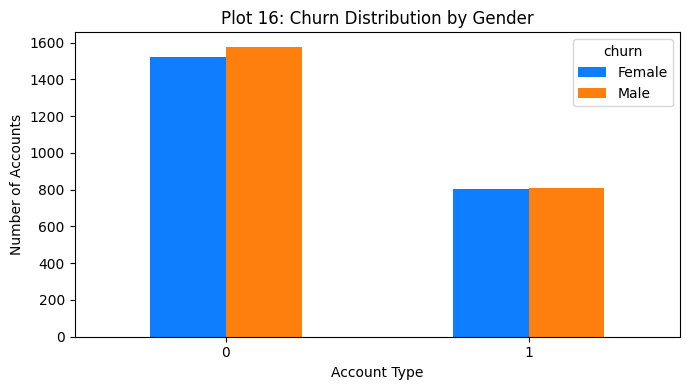

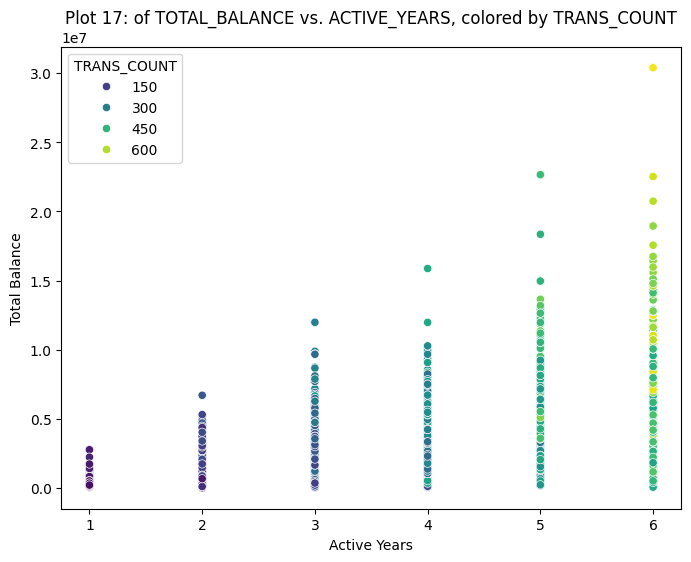

Text(0.5, 1.0, 'Plot 21: Distribution of Transation Count vs. Total Balance')

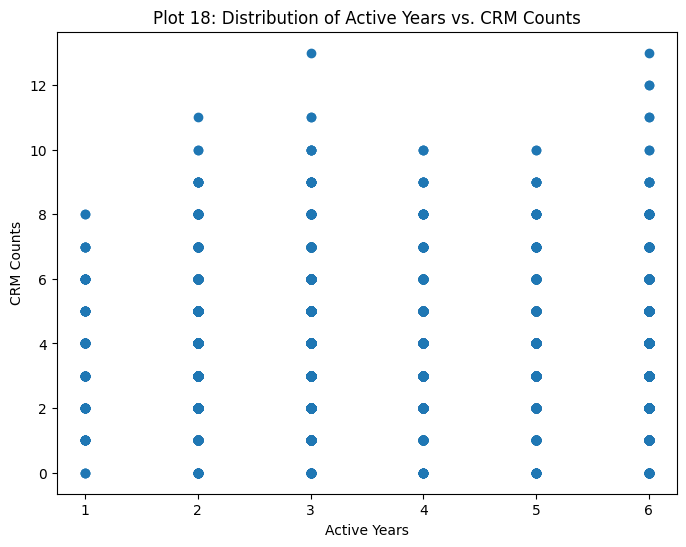

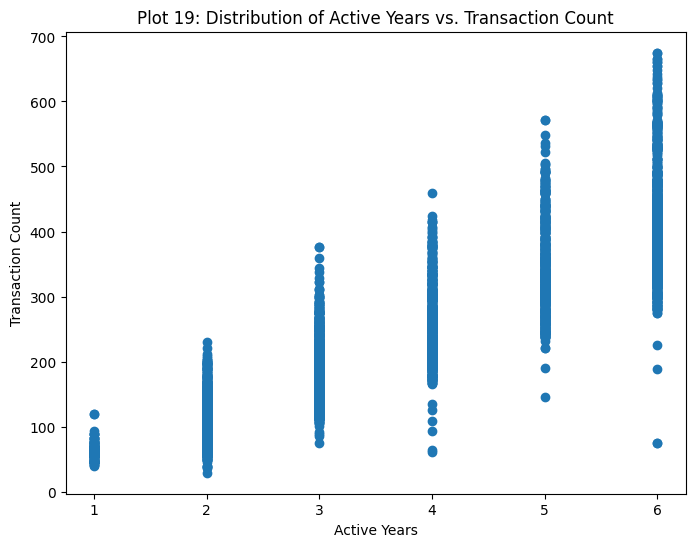

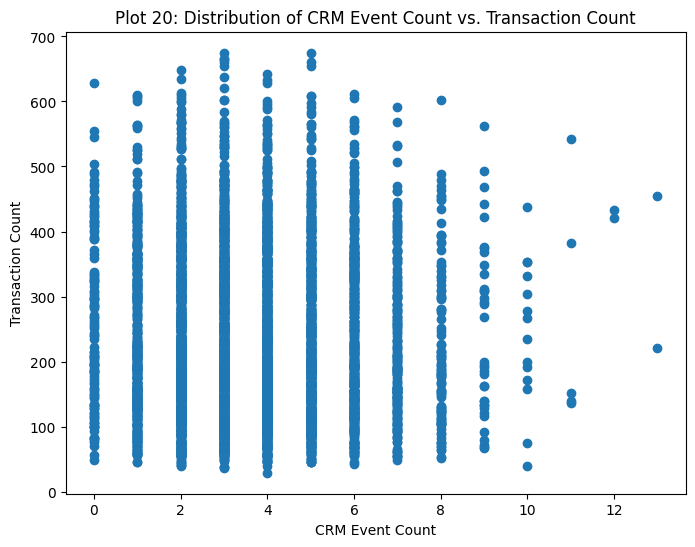

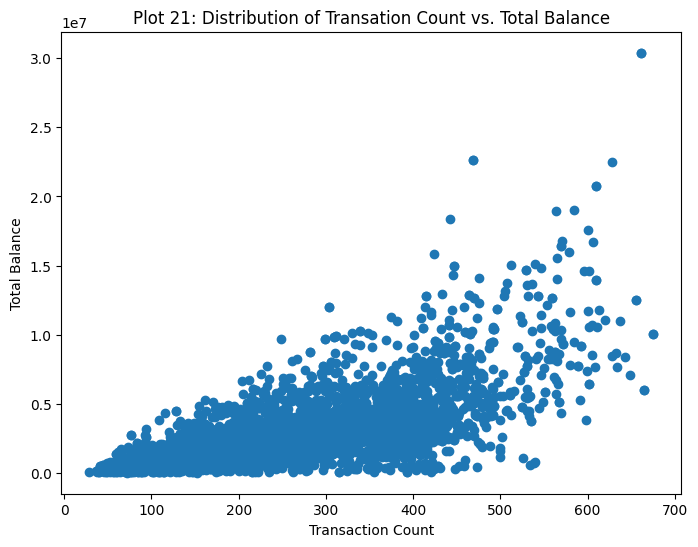

In [66]:

# Plot 1: Churn Distribution
plt.figure(figsize=(8, 6))
fig = px.pie(df, names='churn', title='Plot 15: Churn Distribution', hole=0.44)
fig.update_layout(width=400, height=400)
fig.show()

# Plot 2: Churn Distribution by Gender
account_type_sex_counts = df.groupby(['churn','SEX']).size().unstack(fill_value=0)
account_type_sex_counts.plot(kind='bar', figsize=(7, 4), color=['#0e7eff', '#ff7f0e'])
plt.title('Plot 16: Churn Distribution by Gender')
plt.xlabel('Account Type')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=0)
plt.legend(title='churn')
plt.tight_layout()
plt.show()

# Plot 3: TOTAL_BALANCE vs. ACTIVE_YEARS, colored by TRANS_COUNT
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ACTIVE_YEARS', y='TOTAL_BALANCE', hue='TRANS_COUNT', palette='viridis')
plt.title('Plot 17: of TOTAL_BALANCE vs. ACTIVE_YEARS, colored by TRANS_COUNT')
plt.xlabel('Active Years')
plt.ylabel('Total Balance')
plt.show()

# Plot 4: Distribution of Active Years vs. CRM Counts
plt.figure(figsize=(8, 6))
plt.scatter(df['ACTIVE_YEARS'], df['CRMEVENT_COUNT'])
plt.xlabel('Active Years')
plt.ylabel('CRM Counts')
plt.title('Plot 18: Distribution of Active Years vs. CRM Counts')

# Plot 5: Distribution of Active Years vs. Transaction Count
plt.figure(figsize=(8, 6))
plt.scatter(df['ACTIVE_YEARS'], df['TRANS_COUNT'])
plt.xlabel('Active Years')
plt.ylabel('Transaction Count')
plt.title('Plot 19: Distribution of Active Years vs. Transaction Count')

# Plot 6: Distribution of CRM Event Count vs. Transaction Count
plt.figure(figsize=(8, 6))
plt.scatter(df['CRMEVENT_COUNT'], df['TRANS_COUNT'])
plt.xlabel('CRM Event Count')
plt.ylabel('Transaction Count')
plt.title('Plot 20: Distribution of CRM Event Count vs. Transaction Count')

# Plot 7: Distribution of Transation Count vs. Total Balance
plt.figure(figsize=(8, 6))
plt.scatter(df['TRANS_COUNT'], df['TOTAL_BALANCE'])
plt.xlabel('Transaction Count')
plt.ylabel('Total Balance')
plt.title('Plot 21: Distribution of Transation Count vs. Total Balance')


# Predictive Modelling

Split data, train, Test and evaluate models' accuracy


In [67]:

# Split the data
x = df[['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS']]
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

# Initialize models
models = {
    "Support Vector Machine": SVC(probability=True),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# List to store results
results = []

# Iterate over models and calculate metrics
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Train model

    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    # Append metrics to results
    results.append({
        "Model": model_name.ljust(30),
        "Accuracy": f"{accuracy:.4f}".ljust(10),
        "Precision": f"{precision:.4f}".ljust(10),
        "Recall": f"{recall:.4f}".ljust(10),
        "F1 Score": f"{f1:.4f}".ljust(10),
        "AUC-ROC": f"{auc_roc:.4f}".ljust(10)
    })

# Convert results to DataFrame for easy comparison and left-align columns
results_df = pd.DataFrame(results)
pd.set_option('display.colheader_justify', 'left')
print(results_df.to_string(index=False))

Model                          Accuracy   Precision  Recall     F1 Score   AUC-ROC   
Support Vector Machine         0.8266     0.7917     0.6687     0.7250     0.8564    
Logistic Regression            0.8669     0.7921     0.8282     0.8097     0.9352    
Decision Tree                  0.9958     0.9958     0.9917     0.9938     0.9948    
Gradient Boosting              0.9922     0.9979     0.9793     0.9885     0.9999    
Random Forest                  0.9979     0.9979     0.9959     0.9969     1.0000    


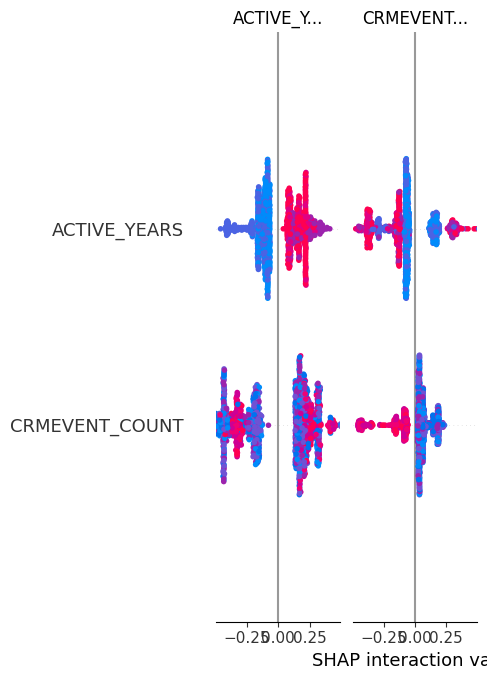

In [68]:
# prompt: Summary plot

explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)

instance_idx = 0
instance = x_test.iloc[instance_idx]
expected_value = explainer.expected_value
instance_shap_values = shap_values[instance_idx]



# Cross-Validation



In [69]:
# Cross-Validation Scores

x = df[['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS']]

# Define thresholds for identifying potential churn
churn_criteria = {
    'ACTIVE_YEARS': 2,          # Low active years
    'CRMEVENT_COUNT': 2,        # Low transaction count
    'TRANS_COUNT': 141,         # Low transaction count
    'TOTAL_BALANCE': 968335,    # Low balance threshold
    'TOTAL_PAYMENTS': 2474      # Low payments threshold
}

# Create Churn column based on meeting at least two of the criteria above
df['churn'] = (
    ((df['ACTIVE_YEARS'] <= churn_criteria['ACTIVE_YEARS']).astype(int) +
     (df['CRMEVENT_COUNT'] <= churn_criteria['CRMEVENT_COUNT']).astype(int) +
     (df['TRANS_COUNT'] <= churn_criteria['TRANS_COUNT']).astype(int) +
     (df['TOTAL_BALANCE'] <= churn_criteria['TOTAL_BALANCE']).astype(int) +
     (df['TOTAL_PAYMENTS'] <= churn_criteria['TOTAL_PAYMENTS']).astype(int)) >= 2
).astype(int)

y = df['churn'] # Now y can access the 'churn' column


# Initialize model
model = RandomForestClassifier(random_state=42)

# Set up k-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and calculate metrics
# Changed X to x as that is how the features were defined.
cv_results = cross_val_score(model, x, y, cv=kf, scoring='accuracy')  # Using accuracy as the metric

# Display results
print(f"Cross-Validation Scores: {cv_results}")
print(f"Mean Accuracy: {np.mean(cv_results):.4f}")
print(f"Standard Deviation: {np.std(cv_results):.4f}")



Cross-Validation Scores: [0.99893843 0.99787686 1.         0.9989373  0.9989373 ]
Mean Accuracy: 0.9989
Standard Deviation: 0.0007


In [70]:
# Stratified k-Fold Cross-Validation Scores


x = df[['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS']]

# Define thresholds for identifying potential churn
churn_criteria = {
    'ACTIVE_YEARS': 2,          # Low active years
    'CRMEVENT_COUNT': 2,        # Low transaction count
    'TRANS_COUNT': 141,         # Low transaction count
    'TOTAL_BALANCE': 968335,    # Low balance threshold
    'TOTAL_PAYMENTS': 2474      # Low payments threshold
}

# Create Churn column based on meeting at least two of the criteria above
df['churn'] = (
    ((df['ACTIVE_YEARS'] <= churn_criteria['ACTIVE_YEARS']).astype(int) +
     (df['CRMEVENT_COUNT'] <= churn_criteria['CRMEVENT_COUNT']).astype(int) +
     (df['TRANS_COUNT'] <= churn_criteria['TRANS_COUNT']).astype(int) +
     (df['TOTAL_BALANCE'] <= churn_criteria['TOTAL_BALANCE']).astype(int) +
     (df['TOTAL_PAYMENTS'] <= churn_criteria['TOTAL_PAYMENTS']).astype(int)) >= 2
).astype(int)

y = df['churn'] # Now y can access the 'churn' column

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize Stratified k-Fold with 5 splits
k = 5
stratified_kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# List to store accuracy for each fold
accuracies = []

# Perform Stratified k-Fold Cross-Validation
# Changed X to x in the split function call.
for train_index, test_index in stratified_kf.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index] # Use iloc to select rows using indices
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print results
print(f"Stratified k-Fold Cross-Validation Scores: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")

Stratified k-Fold Cross-Validation Scores: [1.0, 0.9968152866242038, 0.9989384288747346, 0.9989373007438895, 1.0]
Mean Accuracy: 0.9989
Standard Deviation: 0.0012


In [71]:
# Shuffle-Split Cross-Validation Scores

# Example dataset: Iris dataset
x = df[['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS']]

# Define thresholds for identifying potential churn
churn_criteria = {
    'ACTIVE_YEARS': 2,          # Low active years
    'CRMEVENT_COUNT': 2,        # Low transaction count
    'TRANS_COUNT': 141,         # Low transaction count
    'TOTAL_BALANCE': 968335,    # Low balance threshold
    'TOTAL_PAYMENTS': 2474      # Low payments threshold
}

# Create Churn column based on meeting at least two of the criteria above
df['churn'] = (
    ((df['ACTIVE_YEARS'] <= churn_criteria['ACTIVE_YEARS']).astype(int) +
     (df['CRMEVENT_COUNT'] <= churn_criteria['CRMEVENT_COUNT']).astype(int) +
     (df['TRANS_COUNT'] <= churn_criteria['TRANS_COUNT']).astype(int) +
     (df['TOTAL_BALANCE'] <= churn_criteria['TOTAL_BALANCE']).astype(int) +
     (df['TOTAL_PAYMENTS'] <= churn_criteria['TOTAL_PAYMENTS']).astype(int)) >= 2
).astype(int)

y = df['churn'] # Now y can access the 'churn' column

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Initialize Shuffle-Split with 5 splits and 30% test size
n_splits = 5
test_size = 0.3
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)

# List to store accuracy for each split
accuracies = []

# Perform Shuffle-Split Cross-Validation
for train_index, test_index in shuffle_split.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Print results
print(f"Shuffle-Split Cross-Validation Scores: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")

Shuffle-Split Cross-Validation Scores: [0.997169143665959, 0.9978768577494692, 0.9992922859164898, 0.9978768577494692, 0.9992922859164898]
Mean Accuracy: 0.9983
Standard Deviation: 0.0008


In [72]:

# Split the data
x = df[['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS']]
y = df['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

# Split dataset into features and target variable


# Split the dataset into training and testing sets


# Define the objective function for Bayesian Optimization
def objective(params):
    # Extract hyperparameters from the dictionary
    n_estimators = params['n_estimators']
    max_depth = params['max_depth']
    min_samples_split = params['min_samples_split']
    min_samples_leaf = params['min_samples_leaf']
    bootstrap = params['bootstrap']

    # Initialize the RandomForestClassifier with the current hyperparameters
    rf_model = RandomForestClassifier(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      bootstrap=bootstrap,
                                      random_state=42)

    # Train the model
    rf_model.fit(x_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Return the negative accuracy (because Hyperopt minimizes the objective)
    return -accuracy

# Define the search space for hyperparameters
space = {
    'n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250]),
    'max_depth': hp.choice('max_depth', [None, 10, 20, 30, 40]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
    'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]), # Original list: [1, 2, 4]
    'bootstrap': hp.choice('bootstrap', [True, False])
}

# Create Trials object to track the optimization process
trials = Trials()

# Perform Bayesian Optimization using the Tree-structured Parzen Estimator (TPE)
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,  # Number of evaluations to try
            trials=trials)

# Print the best hyperparameters found
print("Best Hyperparameters:", best)

# Best model evaluation with the found hyperparameters
# Best model evaluation with the found hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=best['n_estimators'],
                                       max_depth=[None, 10, 20, 30, 40][best['max_depth']],  # Accessing value using index
                                       min_samples_split=best['min_samples_split'],
                                       min_samples_leaf=[1, 2, 4][best['min_samples_leaf']],  # Accessing value using index
                                       bootstrap=[True, False][best['bootstrap']],
                                       random_state=42)
# Train the model
best_rf_model.fit(x_train, y_train)

# Make predictions
y_pred = best_rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy * 100:.2f}%")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))



100%|██████████| 30/30 [00:35<00:00,  1.18s/trial, best loss: -0.9978768577494692]
Best Hyperparameters: {'bootstrap': 0, 'max_depth': 0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4}
Accuracy with Best Hyperparameters: 99.15%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       930
           1       1.00      0.98      0.99       483

    accuracy                           0.99      1413
   macro avg       0.99      0.99      0.99      1413
weighted avg       0.99      0.99      0.99      1413



In [73]:
# Test model fitting

x = df[['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS']]
# Define thresholds for identifying potential churn
churn_criteria = {
    'ACTIVE_YEARS': 3,          # Low active years
    'CRMEVENT_COUNT': 4,        # Low transaction count
    'TRANS_COUNT': 216,         # Low transaction count
    'TOTAL_BALANCE': 968335,    # Low balance threshold
    'TOTAL_PAYMENTS': 4211      # Low payments threshold
}

# Create Churn column based on meeting at least two of the criteria above
df['churn'] = (
    ((df['ACTIVE_YEARS'] <= churn_criteria['ACTIVE_YEARS']).astype(int) +
     (df['CRMEVENT_COUNT'] <= churn_criteria['CRMEVENT_COUNT']).astype(int) +
     (df['TRANS_COUNT'] <= churn_criteria['TRANS_COUNT']).astype(int) +
     (df['TOTAL_BALANCE'] <= churn_criteria['TOTAL_BALANCE']).astype(int) +
     (df['TOTAL_PAYMENTS'] <= churn_criteria['TOTAL_PAYMENTS']).astype(int)) >= 2
).astype(int)

# Check the distribution of churn values
#churn_distribution = df['churn'].sum()
churn_distribution = (df['churn'] == 1).sum()
print(churn_distribution)


y = df['churn']
# Assuming X and y are your feature matrix and target vector
# Changed 'X' to 'x' in the train_test_split function call
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the model (e.g., RandomForest)
model = RandomForestClassifier(random_state=42)

# Train the model
# Changed 'X_train' to 'x_train' and 'y_train'
model.fit(x_train, y_train)

# Predict and evaluate on the training set
# Changed 'X_train' to 'x_train'
train_predictions = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predict and evaluate on the test set
# Changed 'X_test' to 'x_test'
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Output the results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Check for overfitting
if train_accuracy > test_accuracy + 0.9:
    print("The model is likely overfitting.")
else:
    print("The model shows no signs of overfitting.")

3322
Training Accuracy: 1.00
Test Accuracy: 1.00
The model shows no signs of overfitting.


In [74]:
# Best model evaluation with the found hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=best['n_estimators'],
                                       max_depth=[None, 10, 20, 30, 40][best['max_depth']],  # Accessing value using index
                                       min_samples_split=best['min_samples_split'],
                                       min_samples_leaf=[1, 2, 4][best['min_samples_leaf']],  # Accessing value using index
                                       bootstrap=[True, False][best['bootstrap']],
                                       random_state=42)
# Train the model
best_rf_model.fit(x_train, y_train) # This line has already been called.

# Make predictions
y_pred = best_rf_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Hyperparameters: {accuracy * 100:.2f}%")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy with Best Hyperparameters: 99.15%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       398
           1       1.00      0.99      0.99      1015

    accuracy                           0.99      1413
   macro avg       0.99      0.99      0.99      1413
weighted avg       0.99      0.99      0.99      1413



<ipython-input-56-aea9e69b966d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




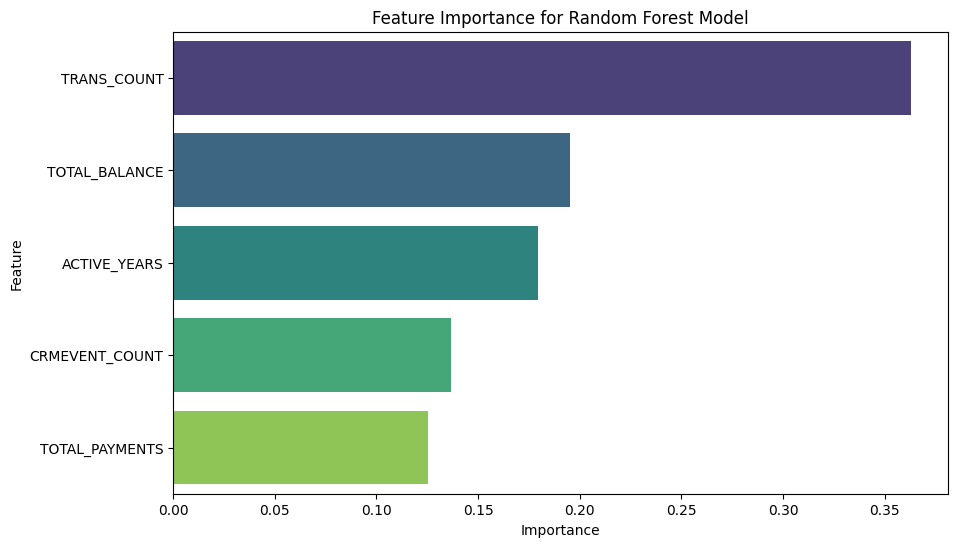

In [56]:
# Extract feature importance from the Gradient Boosting model
gb_feature_importances = models["Random Forest"].feature_importances_

# Define selected_features with the actual feature names
selected_features = ['ACTIVE_YEARS', 'CRMEVENT_COUNT', 'TRANS_COUNT', 'TOTAL_BALANCE', 'TOTAL_PAYMENTS'] # Assuming these are your features

# Create a DataFrame to display feature importance in descending order
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance for Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Classification Report

### Report 1: Confusion Matrix
### Report 2: Classification Report
### Report 3: ROC Curve and AUC
### Report 4: Precision-Recall Curve
### Report 5: F1 Score
### Report 6: Cross-Validation Scores
### Report 7: Learning Curve

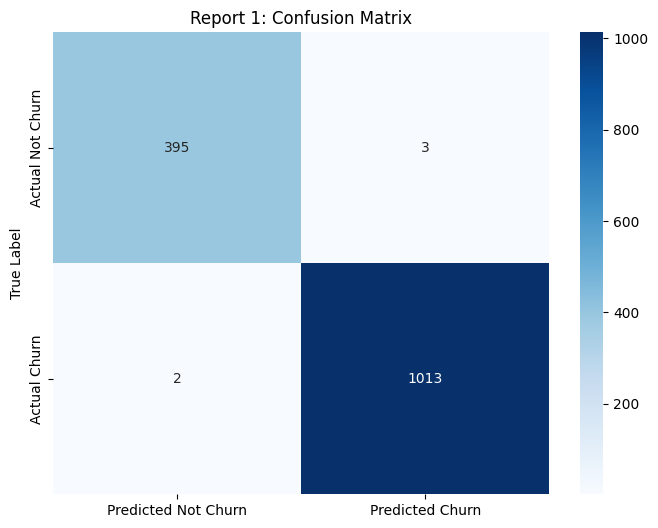

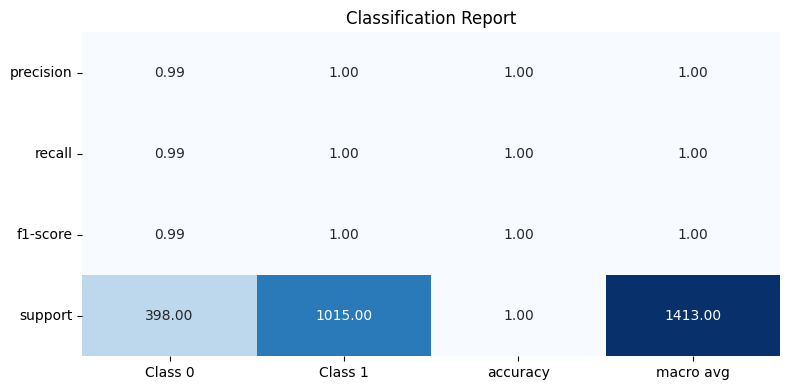

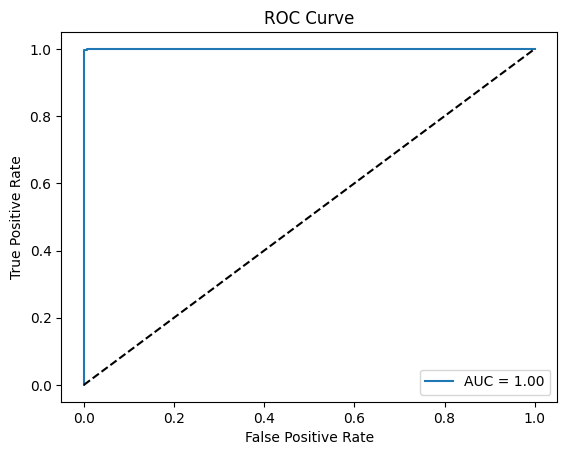

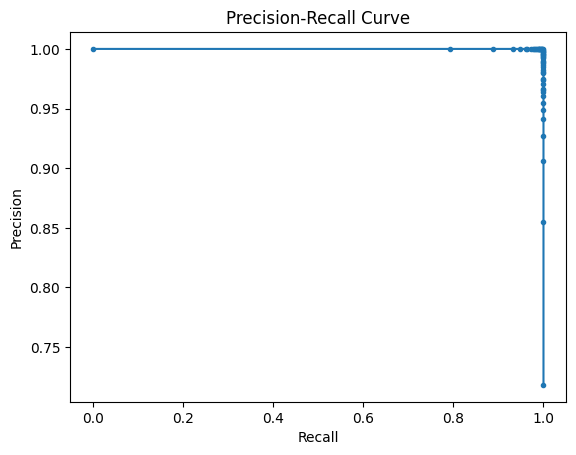

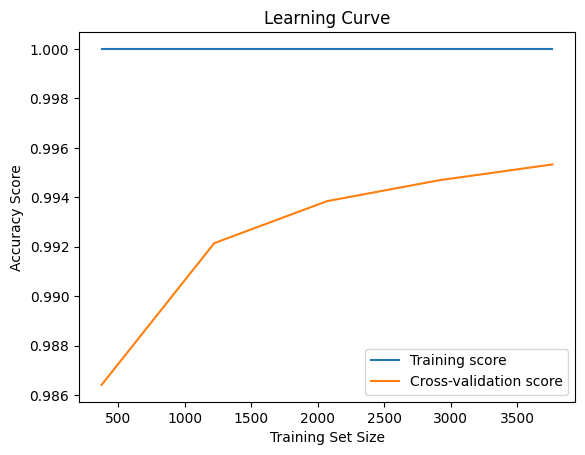

In [60]:
# Classification Report
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


# Report 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Not Churn", "Predicted Churn"],
            yticklabels=["Actual Not Churn", "Actual Churn"])
plt.title("Report 1: Confusion Matrix")
#plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Report 2: Classification Report
# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)
report_df = pd.DataFrame(report).T
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title("Classification Report")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Report 3: ROC Curve and AUC
#ROC Curve and AUC
y_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Report 4: Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


# Report 5: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, scoring='accuracy')
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.title("Learning Curve")
plt.show()
